## TPLAB1 

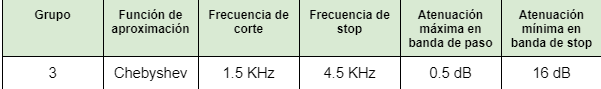




In [2]:
# Calculo orden y ee 
import numpy as np 
import scipy.signal as sig 
import math as m

alfa_max = 0.5
wp = 2*m.pi*1500.0
ws = 2*m.pi*4500.0

wp_n = 1 
ws_n = ws/wp



# cuentas auxiliares

ee = 10**(alfa_max/10)-1

for nn in range(2,6):
    alfa_min_c = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(ws_n))**2 )
    
    print( 'nn {:d} - alfa_min_cheby {:f}'.format(nn, alfa_min_c) )

nn 2 - alfa_min_cheby 15.594677
nn 3 - alfa_min_cheby 30.780589
nn 4 - alfa_min_cheby 46.087878
nn 5 - alfa_min_cheby 61.398796


Como podemos observar siendo $$ \alpha_{min} = 16dB $$ lo pedido, debemos optar por n=3 

la expresion nos queda: 

$$ |T(S)|^2 = \frac{0.715}{S^3+1.252S^2+1.531S+0.715} $$ 

Haciendo el algebra correspondiente queda 

$$ |T(S)| = \frac{0.626}{S+0.626} \frac{1.142}{S^2+0.626S+1.142}  $$ 

Y el lowpass del UAF42 tiene la forma: 

$$ T_{LP} = \frac{A_{LP}\omega_{n}}{S^2+\omega_{n}S+\omega_{n}^2} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

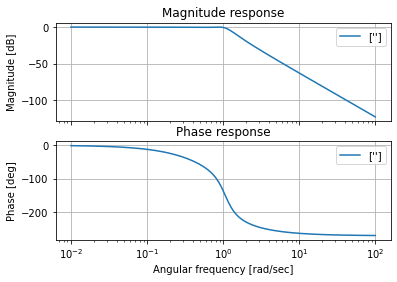

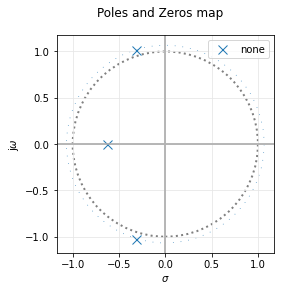

In [8]:
import scipy.signal as sig
import splane as sp

myFilter = sig.TransferFunction([0.715], [1, 1.252, 1.531, 0.715])

sp.bodePlot(myFilter)

sp.pzmap(myFilter)

Hasta ahora todo bien, el problema es cuando quiero pasar la simulacion al LTSpice: 

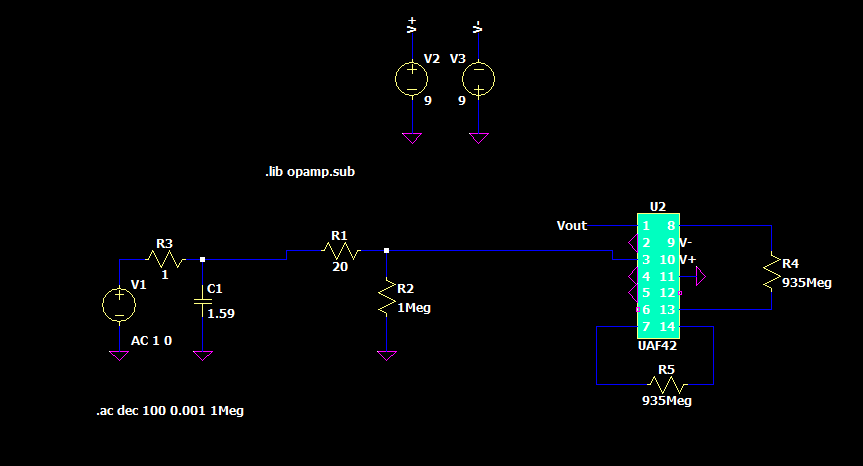
    